C:\ProgramData\Anaconda3\envs\python361\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: read_table is deprecated, use read_csv instead.
  


         CLBH         JQBH          JD         WD
0  3400632554          空车$  118.130793  24.532713
1  3400641940          空车$  118.143047  24.516880
2  3400644572          重车$  118.129677  24.501933
3  3400645070          重车$  118.117227  24.484855
4  3400663074  ACC熄火状态$重车$  118.088708  24.567248
5  3400663074  ACC熄火状态$重车$  118.088708  24.567248
6  3400663164          空车$  118.033718  24.500185
7  3400663184     超速报警$重车$  118.163973  24.475735
8  3400664165          空车$  118.148937  24.490303
9  3400690934          空车$  118.098037  24.492697
==end==


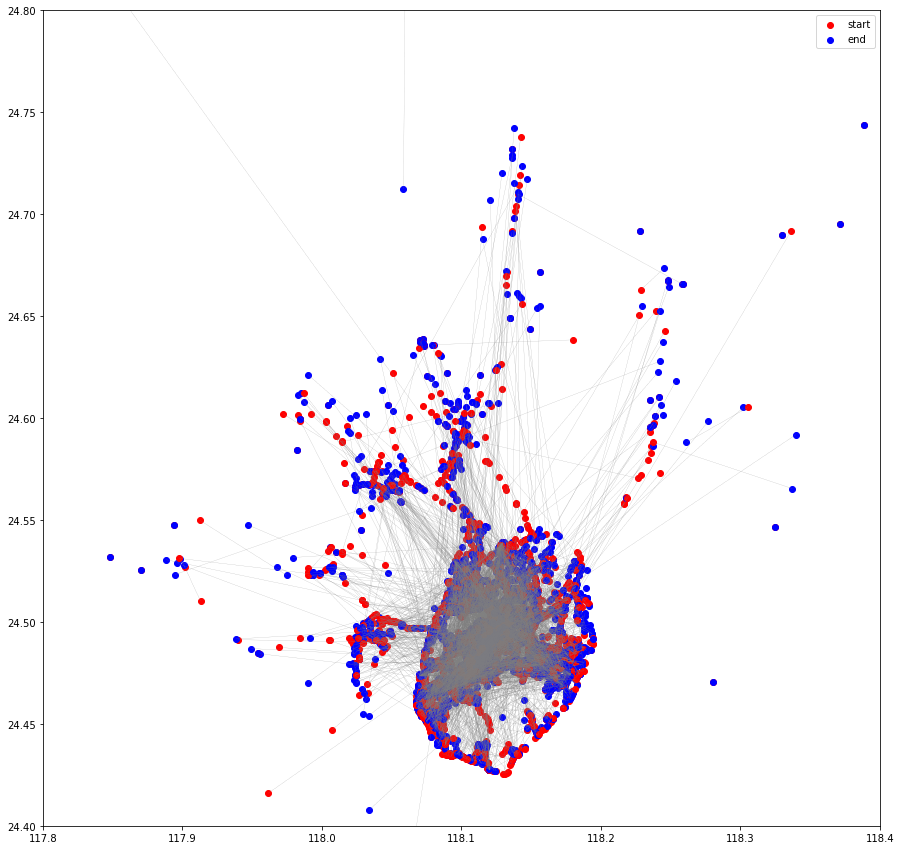

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


input_path="D:\\Git\\pyspark-works\\data\\taxi\\2014-07-02\\2014-07-02-1.txt"

"""

above could be changed
"""


df = pd.read_table(input_path, sep='\t', encoding='GBK')
print(df[["CLBH", "JQBH", "JD", "WD"]].head(10))

df1 = df[["CLBH", "JQBH", "JD", "WD"]].drop_duplicates().dropna()
df1 = df1[(df1['JQBH']=='重车$')|(df1['JQBH']=='空车$')]
df1 = df1[(df1['JD'] < 119)&(df1['WD'] < 25)&(df1['JD'] > 116)&(df1['WD'] > 24)]
d_car = {}
for i in range(len(df1)):
    CLBH = df1['CLBH'].iloc[i]
    JQBH = df1['JQBH'].iloc[i]
    JD = df1['JD'].iloc[i]
    WD = df1['WD'].iloc[i]
    if CLBH in d_car:
        last_JQBH = d_car[CLBH][-1][2]
        if last_JQBH != JQBH:
            d_car[CLBH].append([WD, JD, JQBH])
    else:
        d_car[CLBH] = [[WD, JD, JQBH]]
plt.figure(figsize=(15,15))
for CLBH in d_car:
    plt.plot([d_car[CLBH][0][1], d_car[CLBH][-1][1]], [d_car[CLBH][0][0], d_car[CLBH][-1][0]], '--',
              linewidth=0.2, color='gray')
for CLBH in list(d_car.keys())[:-1]:
    plt.scatter(d_car[CLBH][0][1], d_car[CLBH][0][0], c='r')
    plt.scatter(d_car[CLBH][-1][1], d_car[CLBH][-1][0], c='b')
CLBH = list(d_car.keys())[-1]
plt.scatter(d_car[CLBH][0][1], d_car[CLBH][0][0], c='r', label='start')
plt.scatter(d_car[CLBH][-1][1], d_car[CLBH][-1][0], c='b', label='end')
plt.xlim(117.8, 118.4)
plt.ylim(24.4, 24.8)
plt.legend()
plt.show()


print("==end==")